Configure home directory and YOLO install

In [1]:
import os
HOME = os.getcwd()
print(HOME)

# Import YOLO
from IPython import display
display.clear_output()
!yolo checks
from ultralytics import YOLO
from IPython.display import display, Image

# Import CV2
import cv2

import time

Ultralytics 8.3.33 🚀 Python-3.11.2 torch-2.5.1 CPU (Cortex-A76)
Setup complete ✅ (4 CPUs, 7.9 GB RAM, 19.2/58.0 GB disk)

OS                  Linux-6.6.51+rpt-rpi-2712-aarch64-with-glibc2.36
Environment         Linux
Python              3.11.2
Install             git
RAM                 7.86 GB
Disk                19.2/58.0 GB
CPU                 Cortex-A76
CPU count           4
GPU                 None
GPU count           None
CUDA                None

numpy               ✅ 2.1.3>=1.23.0
matplotlib          ✅ 3.9.2>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.5.1>=1.8.0
torchvision         ✅ 0.20.1>=0.9.0
tqdm                ✅ 4.67.0>=4.64.0
psutil              ✅ 6.1.0
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.3>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytics-thop    ✅ 2.0.11>=2.0.0
numpy           

Previous img 'img/captured_image.jpg' has been removed.

image 1/1 /home/tyche/ForeHelm/YOLO_example/img/captured_image.jpg: 480x640 (no detections), 404.8ms
Speed: 3.5ms preprocess, 404.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /home/tyche/ForeHelm/runs/detect/predict23


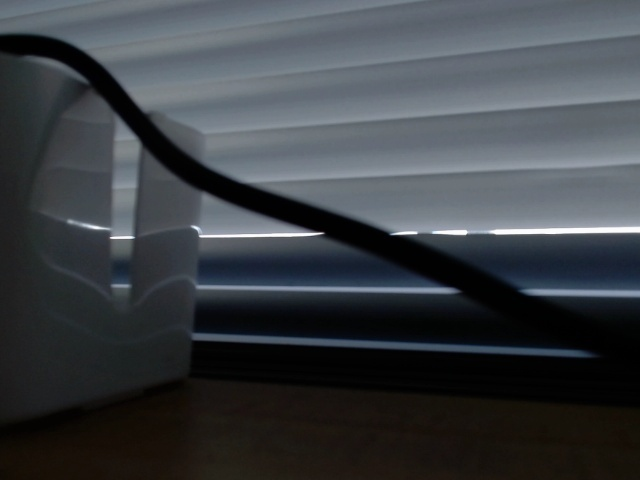

In [18]:

img_path = "img/captured_image.jpg"

if os.path.exists(img_path):
    os.remove(img_path)
    print(f"Previous img '{img_path}' has been removed.")

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
cap.set(cv2.CAP_PROP_FPS, 30)

status, photo = cap.read()
cv2.imwrite(img_path, photo)
cap.release()

# Image(filename=img_path, height=640)

# !yolo task=detect mode=predict model=yolov11n.pt conf=0.25 source='img/captured_image.jpg' project='runs'
# Load a pretrained YOLOv11 model
model = YOLO('yolo11n.pt')  # Choose the appropriate model variant
results = model.predict(source=img_path, save=True, conf=0.5)
output_path = results[0].save_dir + "/captured_image.jpg"
Image(filename=output_path, height=640)


In [ ]:
# Load a pre-trained YOLO model
model = YOLO("yolo11n.pt")

# Start tracking objects in a video
# You can also use live video streams or webcam input
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='img/captured_image.jpg'
Image(filename='runs/detect/predict/captured_image.jpg', height=620)

# Load a pre-trained YOLO model
model = YOLO("yolo11n.pt")

# Start tracking objects in a video
# You can also use live video streams or webcam input
model.predict(source="path/to/video.mp4")

100%|██████████| 5.35M/5.35M [00:00<00:00, 17.5MB/s]
17871.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Ultralytics 8.3.33 🚀 Python-3.11.2 torch-2.5.1 CPU (Cortex-A76)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs



In [6]:
!yolo task=detect mode=predict model=yolov11n.pt source=0 show=true

Traceback (most recent call last):
  File "/home/tyche/ForeHelm/.venv/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/home/tyche/ForeHelm/.venv/lib/python3.11/site-packages/ultralytics/cfg/__init__.py", line 940, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tyche/ForeHelm/.venv/lib/python3.11/site-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/home/tyche/ForeHelm/.venv/lib/python3.11/site-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/home/tyche/ForeHelm/.venv/lib/python3.11/site-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/tyche/ForeHelm/.venv/lib/python3.11/site-packages/ultralytics/nn/tasks.py", li